# MNIST Dataset Project - CNN

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from tensorflow.keras.datasets import mnistst

In [5]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [6]:
X_train.shape

(60000, 28, 28)

In [7]:
y_train.shape

(60000,)

In [8]:
X_test.shape

(10000, 28, 28)

In [9]:
y_test.shape

(10000,)

In [11]:
single_image = X_train[0]

In [13]:
single_image.shape

(28, 28)

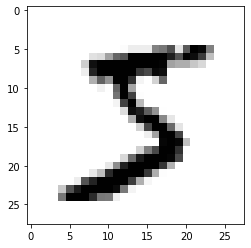

In [15]:
plt.imshow(single_image,cmap='binary')

In [16]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

### Data Preprocessing & One hot encoding:

In [17]:
from tensorflow.keras.utils import to_categorical

In [18]:
y_example = to_categorical(y_train)

In [19]:
y_example.shape

(60000, 10)

In [21]:
y_example[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [22]:
y_cat_test = to_categorical(y_test,num_classes=10)
y_cat_train = to_categorical(y_train,num_classes=10)

In [23]:
single_image.max()

255

In [24]:
single_image.min()

0

In [25]:
X_train = X_train/255
X_test = X_test/255

In [27]:
scaled_image = X_train[0]

In [28]:
scaled_image.max()

1.0

In [29]:
scaled_image.min()

0.0

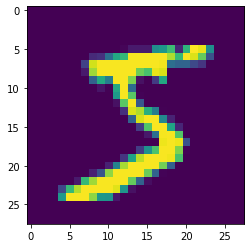

In [30]:
plt.imshow(scaled_image)

In [31]:
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

### Model creation and training

In [32]:
from tensorflow.keras.models import Sequential

In [33]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [37]:
model = Sequential()

#convolution layer
model.add(Conv2D(filters = 32, kernel_size = (4,4), strides=(1,1),padding = 'valid', input_shape=(28,28,1),activation='relu'))

#pooling layer
model.add(MaxPool2D(pool_size=(2, 2)))

#flattening layer
model.add(Flatten())

#dense layer
model.add(Dense(128,activation='relu'))

#output layer ---> softmax for multiclass
model.add(Dense(10,activation='softmax'))

#compile
model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [38]:
from tensorflow.keras.callbacks import EarlyStopping

In [39]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 5)

In [40]:
model.fit(x = X_train, y = y_cat_train,epochs = 20, 
          validation_data=(X_test, y_cat_test),
         callbacks = [early_stop])

Epoch 1/20
1875/1875 [==============================] - 39s 21ms/step - loss: 0.1368 - accuracy: 0.9597 - val_loss: 0.0520 - val_accuracy: 0.9827
Epoch 2/20
1875/1875 [==============================] - 44s 24ms/step - loss: 0.0456 - accuracy: 0.9858 - val_loss: 0.0437 - val_accuracy: 0.9856
Epoch 3/20
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0290 - accuracy: 0.9912 - val_loss: 0.0367 - val_accuracy: 0.9871
Epoch 4/20
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0199 - accuracy: 0.9937 - val_loss: 0.0415 - val_accuracy: 0.9869
Epoch 5/20
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0132 - accuracy: 0.9958 - val_loss: 0.0474 - val_accuracy: 0.9864
Epoch 6/20
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0107 - accuracy: 0.9964 - val_loss: 0.0364 - val_accuracy: 0.9892
Epoch 7/20
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0078 - accuracy: 0.9973 - val_loss: 0.0400 -

## Model Evaluation

In [42]:
metrics = pd.DataFrame(model.history.history)

In [43]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,0.136773,0.959683,0.052006,0.9827
1,0.045576,0.985817,0.043679,0.9856
2,0.028978,0.991250,0.036740,0.9871
3,0.019896,0.993717,0.041492,0.9869
4,0.013247,0.995783,0.047437,0.9864
5,0.010692,0.996400,0.036362,0.9892
6,0.007827,0.997250,0.039971,0.9891
7,0.006648,0.997850,0.041523,0.9879
8,0.004880,0.998367,0.043877,0.9884
9,0.004120,0.998767,0.059220,0.9884


<AxesSubplot:>

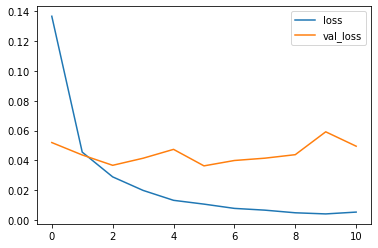

In [44]:
metrics[['loss','val_loss']].plot()

<AxesSubplot:>

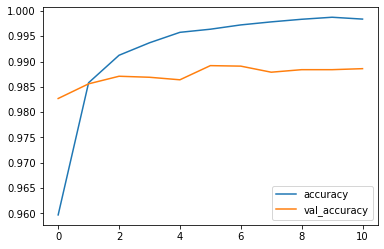

In [46]:
metrics[['accuracy','val_accuracy']].plot()

In [47]:
model.metrics_names

['loss', 'accuracy']

In [48]:
model.evaluate(X_test, y_cat_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.0496 - accuracy: 0.9886


[0.04955931007862091, 0.9886000156402588]

In [49]:
from sklearn.metrics import confusion_matrix, classification_report

In [50]:
predictions = model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [52]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.98      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.98      0.99       958
           7       0.99      0.98      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [53]:
print(confusion_matrix(y_test, predictions))

[[ 977    0    1    1    0    0    1    0    0    0]
 [   1 1128    1    2    0    1    2    0    0    0]
 [   1    0 1024    0    0    0    1    3    3    0]
 [   0    0    1 1004    0    2    0    1    1    1]
 [   0    0    0    0  976    0    1    0    0    5]
 [   1    0    0    9    0  879    2    0    1    0]
 [   7    2    0    1    4    1  942    0    1    0]
 [   0    3    6    1    1    0    0 1009    1    7]
 [   5    1    4    1    0    1    0    0  960    2]
 [   0    1    0    6    6    5    0    2    2  987]]


In [54]:
import seaborn as sns

<AxesSubplot:>

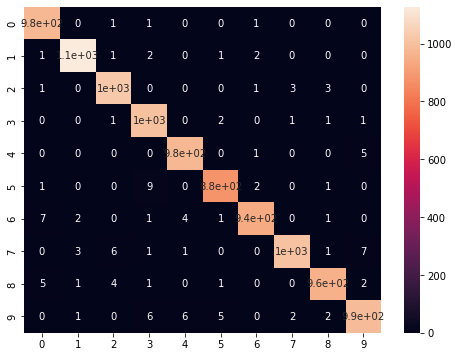

In [57]:
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, predictions),annot=True)

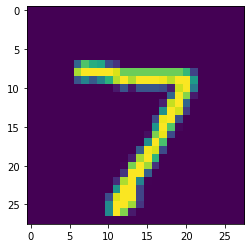

In [59]:
my_num = X_test[0]
plt.imshow(my_num)

In [61]:
model.predict_classes(my_num.reshape((1,28,28,1)))

array([7], dtype=int64)

## The End